In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/titanic_train.csv')
df

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.isnull().sum()

Unnamed: 0       0
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [11]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode())

In [6]:
df = df.drop(columns = ['Unnamed: 0', 'PassengerId', 'Name', 'Cabin'], axis = 1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,S
887,1,1,female,19.0,0,0,112053,30.0000,S
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,S
889,1,1,male,26.0,0,0,111369,30.0000,C


In [7]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [13]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
lab_enc = LabelEncoder()

In [14]:
df_2 = lab_enc.fit_transform(df['Sex'])
df_3 = lab_enc.fit_transform(df['Embarked'])

In [15]:
df['Sex'] = df_2
df['Embarked'] = df_3

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    int32  
dtypes: float64(2), int32(2), int64(4), object(1)
memory usage: 55.8+ KB


In [17]:
df_dummies = pd.get_dummies(df['Ticket'], drop_first=True)
df_dummies

,110413,110465,110564,110813,111240,111320,111361,111369,111426,111427,...,STON/O2. 3101290,SW/PP 751,W./C. 14258,W./C. 14263,W./C. 6607,W./C. 6608,W./C. 6609,W.E.P. 5734,W/C 14208,WE/P 5735
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
887,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
888,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
889,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
df = df.join(df_dummies)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,110413,...,STON/O2. 3101290,SW/PP 751,W./C. 14258,W./C. 14263,W./C. 6607,W./C. 6608,W./C. 6609,W.E.P. 5734,W/C 14208,WE/P 5735
0,0,3,1,22.000000,1,0,A/5 21171,7.2500,2,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,38.000000,1,0,PC 17599,71.2833,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,3,0,26.000000,0,0,STON/O2. 3101282,7.9250,2,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,35.000000,1,0,113803,53.1000,2,0,...,0,0,0,0,0,0,0,0,0,0
4,0,3,1,35.000000,0,0,373450,8.0500,2,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,211536,13.0000,2,0,...,0,0,0,0,0,0,0,0,0,0
887,1,1,0,19.000000,0,0,112053,30.0000,2,0,...,0,0,0,0,0,0,0,0,0,0
888,0,3,0,29.699118,1,2,W./C. 6607,23.4500,2,0,...,0,0,0,0,1,0,0,0,0,0
889,1,1,1,26.000000,0,0,111369,30.0000,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
df.drop(columns = ['Ticket'], axis = 1, inplace = True)

In [20]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,110413,110465,...,STON/O2. 3101290,SW/PP 751,W./C. 14258,W./C. 14263,W./C. 6607,W./C. 6608,W./C. 6609,W.E.P. 5734,W/C 14208,WE/P 5735
0,0,3,1,22.000000,1,0,7.2500,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,38.000000,1,0,71.2833,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,3,0,26.000000,0,0,7.9250,2,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,35.000000,1,0,53.1000,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,3,1,35.000000,0,0,8.0500,2,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2,0,0,...,0,0,0,0,0,0,0,0,0,0
887,1,1,0,19.000000,0,0,30.0000,2,0,0,...,0,0,0,0,0,0,0,0,0,0
888,0,3,0,29.699118,1,2,23.4500,2,0,0,...,0,0,0,0,1,0,0,0,0,0
889,1,1,1,26.000000,0,0,30.0000,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,110413,110465,...,STON/O2. 3101290,SW/PP 751,W./C. 14258,W./C. 14263,W./C. 6607,W./C. 6608,W./C. 6609,W.E.P. 5734,W/C 14208,WE/P 5735
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,...,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,1.538721,0.003367,0.002245,...,0.001122,0.001122,0.001122,0.001122,0.002245,0.004489,0.001122,0.001122,0.001122,0.002245
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.794231,0.057961,0.047351,...,0.033501,0.033501,0.033501,0.033501,0.047351,0.066890,0.033501,0.033501,0.033501,0.047351
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# observations

# the std and max value in columns age, sibsp and fare appear to be too high
# seems outliers present in the above mentioned columns

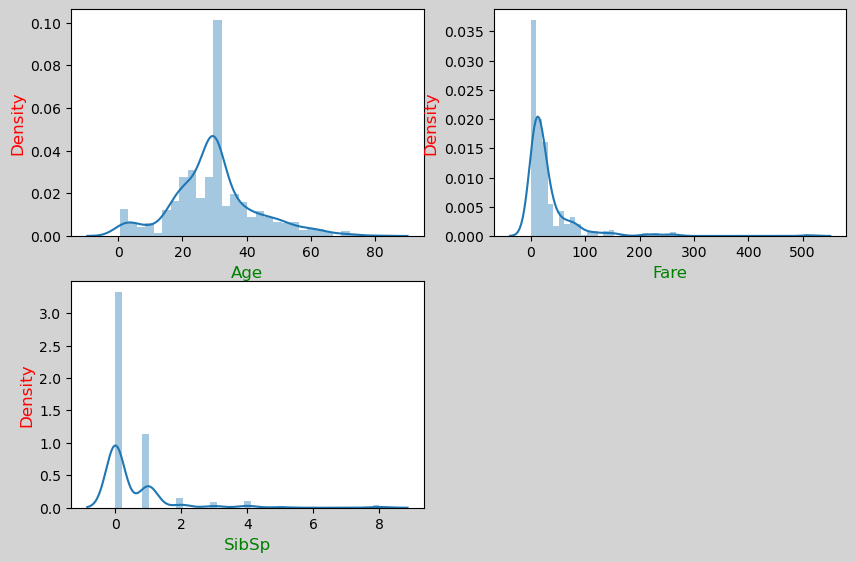

In [23]:
plt.figure(figsize=(10,10), facecolor='lightgrey')
graph_no = 1

for column in df[['Age', 'Fare', 'SibSp']]:
    if graph_no <= 6:
        ax = plt.subplot(3,2, graph_no)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=12, color='green')
        plt.ylabel('Density', fontsize=12, color='red')
        
    graph_no += 1
plt.show()

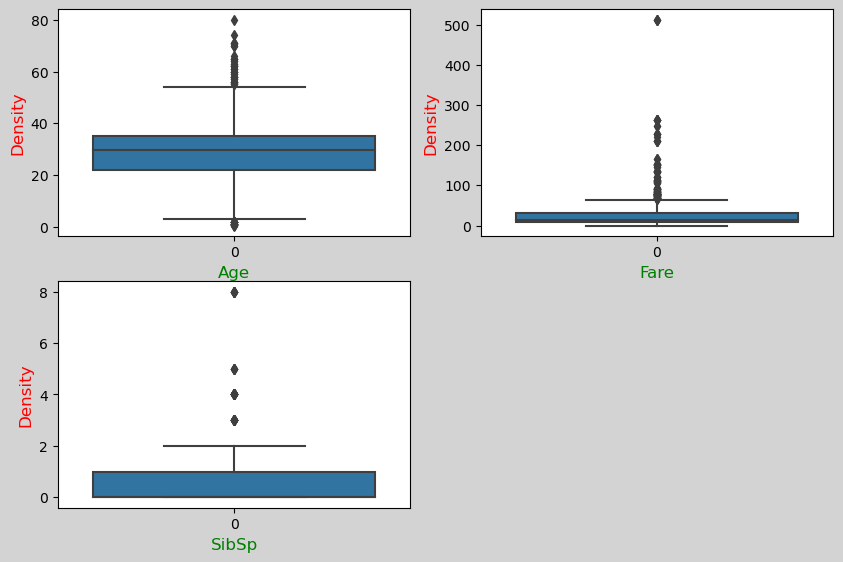

In [25]:
plt.figure(figsize=(10,10), facecolor='lightgrey')
graph_no = 1

for column in df[['Age', 'Fare', 'SibSp']]:
    if graph_no <= 6:
        ax = plt.subplot(3,2, graph_no)
        sns.boxplot(df[column])
        plt.xlabel(column, fontsize=12, color='green')
        plt.ylabel('Density', fontsize=12, color='red')
        
    graph_no += 1
plt.show()

In [26]:
q1 = df.quantile(0.25)

q3 = df.quantile(0.75)

iqr = q3 - q1

In [27]:
age_high = (q3.Age + (1.5 * iqr.Age))
print(age_high)

index = np.where(df['Age'] > age_high)
print(index)

df = df.drop(df.index[index])

print(df.shape)

df.reset_index()

54.5
(array([ 11,  15,  33,  54,  94,  96, 116, 152, 170, 174, 195, 232, 252,
       268, 275, 280, 326, 366, 438, 456, 467, 483, 487, 492, 493, 545,
       555, 570, 587, 625, 626, 630, 647, 659, 672, 684, 694, 745, 772,
       829, 851, 879], dtype=int64),)
(849, 688)


,index,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,110413,...,STON/O2. 3101290,SW/PP 751,W./C. 14258,W./C. 14263,W./C. 6607,W./C. 6608,W./C. 6609,W.E.P. 5734,W/C 14208,WE/P 5735
0,0,0,3,1,22.000000,1,0,7.2500,2,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,38.000000,1,0,71.2833,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1,3,0,26.000000,0,0,7.9250,2,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1,1,0,35.000000,1,0,53.1000,2,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,3,1,35.000000,0,0,8.0500,2,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844,886,0,2,1,27.000000,0,0,13.0000,2,0,...,0,0,0,0,0,0,0,0,0,0
845,887,1,1,0,19.000000,0,0,30.0000,2,0,...,0,0,0,0,0,0,0,0,0,0
846,888,0,3,0,29.699118,1,2,23.4500,2,0,...,0,0,0,0,1,0,0,0,0,0
847,889,1,1,1,26.000000,0,0,30.0000,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
age_low = (q1.Age - (1.5 * iqr.Age))
print(age_low)

index = np.where(df['Age'] < age_low)
print(index)

df = df.drop(df.index[index])

print(df.shape)

df.reset_index()

2.5
(array([], dtype=int64),)
(825, 688)


,index,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,110413,...,STON/O2. 3101290,SW/PP 751,W./C. 14258,W./C. 14263,W./C. 6607,W./C. 6608,W./C. 6609,W.E.P. 5734,W/C 14208,WE/P 5735
0,0,0,3,1,22.000000,1,0,7.2500,2,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,38.000000,1,0,71.2833,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1,3,0,26.000000,0,0,7.9250,2,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1,1,0,35.000000,1,0,53.1000,2,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,3,1,35.000000,0,0,8.0500,2,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,886,0,2,1,27.000000,0,0,13.0000,2,0,...,0,0,0,0,0,0,0,0,0,0
821,887,1,1,0,19.000000,0,0,30.0000,2,0,...,0,0,0,0,0,0,0,0,0,0
822,888,0,3,0,29.699118,1,2,23.4500,2,0,...,0,0,0,0,1,0,0,0,0,0
823,889,1,1,1,26.000000,0,0,30.0000,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
fare_high = (q3.Fare + (1.5 * iqr.Fare))
print(fare_high)

index = np.where(df['Fare'] > fare_high)
print(index)

df = df.drop(df.index[index])

print(df.shape)

df.reset_index()

65.6344
(array([  1,  23,  27,  29,  47,  55,  56,  66,  81,  93, 108, 109, 113,
       128, 140, 147, 164, 183, 196, 199, 205, 211, 225, 235, 236, 237,
       241, 247, 266, 267, 274, 280, 281, 284, 285, 292, 293, 298, 299,
       305, 307, 309, 310, 313, 340, 344, 346, 348, 351, 355, 359, 362,
       381, 404, 413, 421, 447, 449, 456, 458, 464, 465, 480, 487, 496,
       499, 503, 508, 514, 515, 537, 541, 546, 564, 580, 593, 595, 604,
       608, 613, 626, 628, 635, 643, 645, 653, 661, 675, 682, 686, 687,
       702, 706, 708, 721, 730, 733, 743, 760, 771, 782, 785, 791, 798],
      dtype=int64),)
(721, 688)


,index,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,110413,...,STON/O2. 3101290,SW/PP 751,W./C. 14258,W./C. 14263,W./C. 6607,W./C. 6608,W./C. 6609,W.E.P. 5734,W/C 14208,WE/P 5735
0,0,0,3,1,22.000000,1,0,7.2500,2,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,3,0,26.000000,0,0,7.9250,2,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,1,0,35.000000,1,0,53.1000,2,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,3,1,35.000000,0,0,8.0500,2,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,3,1,29.699118,0,0,8.4583,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,886,0,2,1,27.000000,0,0,13.0000,2,0,...,0,0,0,0,0,0,0,0,0,0
717,887,1,1,0,19.000000,0,0,30.0000,2,0,...,0,0,0,0,0,0,0,0,0,0
718,888,0,3,0,29.699118,1,2,23.4500,2,0,...,0,0,0,0,1,0,0,0,0,0
719,889,1,1,1,26.000000,0,0,30.0000,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
sib_sp_high = (q3.SibSp + (1.5 * iqr.SibSp))
print(sib_sp_high)

index = np.where(df['SibSp'] > sib_sp_high)
print(index)

df = df.drop(df.index[index])

print(df.shape)

df.reset_index()

2.5
(array([ 19,  41,  48,  50,  55,  58,  70, 141, 144, 149, 189, 191, 214,
       218, 227, 299, 326, 388, 391, 434, 435, 511, 548, 550, 584, 634,
       655, 661, 684], dtype=int64),)
(692, 688)


,index,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,110413,...,STON/O2. 3101290,SW/PP 751,W./C. 14258,W./C. 14263,W./C. 6607,W./C. 6608,W./C. 6609,W.E.P. 5734,W/C 14208,WE/P 5735
0,0,0,3,1,22.000000,1,0,7.2500,2,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,3,0,26.000000,0,0,7.9250,2,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,1,0,35.000000,1,0,53.1000,2,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,3,1,35.000000,0,0,8.0500,2,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,3,1,29.699118,0,0,8.4583,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687,886,0,2,1,27.000000,0,0,13.0000,2,0,...,0,0,0,0,0,0,0,0,0,0
688,887,1,1,0,19.000000,0,0,30.0000,2,0,...,0,0,0,0,0,0,0,0,0,0
689,888,0,3,0,29.699118,1,2,23.4500,2,0,...,0,0,0,0,1,0,0,0,0,0
690,889,1,1,1,26.000000,0,0,30.0000,0,0,...,0,0,0,0,0,0,0,0,0,0


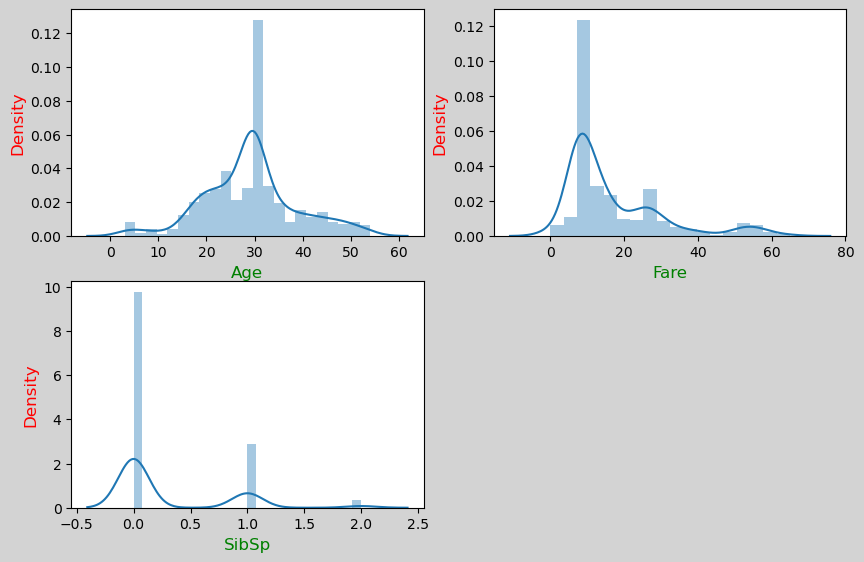

In [36]:
plt.figure(figsize=(10,10), facecolor='lightgrey')
graph_no = 1

for column in df[['Age', 'Fare', 'SibSp']]:
    if graph_no <= 6:
        ax = plt.subplot(3,2, graph_no)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=12, color='green')
        plt.ylabel('Density', fontsize=12, color='red')
        
    graph_no += 1
plt.show()

In [37]:
df['Survived'].value_counts()

0    454
1    238
Name: Survived, dtype: int64

In [39]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

In [40]:
x = df.drop(columns = ['Survived'], axis = 1)
y = df.Survived

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [42]:
gb_clf = GradientBoostingClassifier()
gb_clf.fit(x_train, y_train)

GradientBoostingClassifier()

In [43]:
def metric_score(gb_clf, x_train, x_test, y_train, y_test, train=True):
    
    if train == True:
        y_pred = gb_clf.predict(x_train)
        
        print('Train Result : ')
        print('Accuracy Score : ', accuracy_score(y_train, y_pred), '\n')
        
    elif train == False:
        pred = gb_clf.predict(x_test)
        
        print('Test Result : ')
        print('Accuracy Score : ', accuracy_score(y_test, pred), '\n')
        
        print('Classification Report : \n', classification_report(y_test, pred))

In [44]:
metric_score(gb_clf, x_train, x_test, y_train, y_test, train=True)

metric_score(gb_clf, x_train, x_test, y_train, y_test, train=False)

Train Result : 
Accuracy Score :  0.8689788053949904 

Test Result : 
Accuracy Score :  0.7976878612716763 

Classification Report : 
               precision    recall  f1-score   support

           0       0.81      0.90      0.85       112
           1       0.77      0.61      0.68        61

    accuracy                           0.80       173
   macro avg       0.79      0.75      0.77       173
weighted avg       0.79      0.80      0.79       173



In [45]:
para = {'n_estimators' : range(95, 110, 5), 'learning_rate' : [0.2, 0.5], 'max_depth' : range(2,5), 
        'min_samples_split' : range(1,3), 'min_samples_leaf' : range(1,3)}

In [46]:
gs_cv = GridSearchCV(GradientBoostingClassifier(), param_grid = para, cv = 5)
gs_cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.2, 0.5], 'max_depth': range(2, 5),
                         'min_samples_leaf': range(1, 3),
                         'min_samples_split': range(1, 3),
                         'n_estimators': range(95, 110, 5)})

In [47]:
gs_cv.best_params_

{'learning_rate': 0.2,
 'max_depth': 2,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [48]:
gs_cv.best_estimator_

GradientBoostingClassifier(learning_rate=0.2, max_depth=2, min_samples_leaf=2)

In [65]:
gb_clf = GradientBoostingClassifier(learning_rate=0.1, max_depth=1, min_samples_leaf=2, n_estimators=120)
gb_clf.fit(x_train, y_train)

GradientBoostingClassifier(max_depth=1, min_samples_leaf=2, n_estimators=120)

In [66]:
metric_score(gb_clf, x_train, x_test, y_train, y_test, train=True)

metric_score(gb_clf, x_train, x_test, y_train, y_test, train=False)

Train Result : 
Accuracy Score :  0.8265895953757225 

Test Result : 
Accuracy Score :  0.791907514450867 

Classification Report : 
               precision    recall  f1-score   support

           0       0.82      0.87      0.84       112
           1       0.73      0.66      0.69        61

    accuracy                           0.79       173
   macro avg       0.77      0.76      0.77       173
weighted avg       0.79      0.79      0.79       173

